<a href="https://colab.research.google.com/github/EddyGiusepe/Repasso_Python/blob/main/NLP_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center">Natural Language Processing with Disaster Tweets</h2>

Data Scientist: Dr.Eddy Giusepe Chirinos Isidro


Objetivo:

* Preveja quais Tweets são sobre desastres reais e quais não são. 


Resumo:

Esse desafio específico é perfeito para cientistas de dados que desejam começar com o Processamento de linguagem natural. O conjunto de dados da concorrência não é muito grande e, mesmo se você não tiver muito poder de computação pessoal, poderá fazer todo o trabalho em nosso ambiente Jupyter Notebooks gratuito e sem configuração chamado Kaggle Notebooks . 

Baixar os Dados do Kaggle: [aqui](https://www.kaggle.com/competitions/nlp-getting-started/data).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt


In [3]:
PATH = Path('/content/drive/MyDrive/5_Scripts_in_Python_Eddy/3_SENSIO_ML_DL/Kaggle_NLP_with_Disaster_Tweets/data_Tweets')
os.listdir(PATH)


['sample_submission.csv', 'test.csv', 'train.csv']

In [4]:
sample_submission = pd.read_csv(PATH/"sample_submission.csv")
sample_submission.head()


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [5]:
# Kaggle --> F1-score = 0.57033

sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
 1   target  3263 non-null   int64
dtypes: int64(2)
memory usage: 51.1 KB


In [6]:
test = pd.read_csv(PATH/"test.csv")

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [7]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# Usaremos só duas colunas em meus Dados de test

test[["id", "text"]]

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [9]:
train = pd.read_csv(PATH/"train.csv")

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
train.head()
# 1 --> É um desastre
# 0 --> Não é um desastre

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
# Usaremos só duas colunas, também, em meus Dados de train

train[["id", "text", "target"]]

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


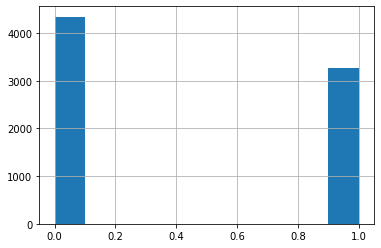

In [12]:
# Visualizamos as distribuição de classes

train['target'].hist()
plt.show()

# Observamos que os Dados estão "bem balanceado"

In [20]:
# Contando os valores nessa série

train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [22]:
# Salvamos nossos Dados "LIMPOS"

train[["id", "text", "target"]].to_csv(PATH/"train_clean.csv", index=False)
test[["id", "text"]].to_csv(PATH/"test_clean.csv", index=False)